## Spatial transcriptomics deconvolution visualization

We support to visualize the scatterpie chart for any deconvolution or label transferring tools.

Here we will describe how to use SPOTlight and Seurat Label transferring to visualize in stLearn

### SPOTlight

You can follow the tutorial of SPOTlight in their git repository: https://github.com/MarcElosua/SPOTlight

After done the tutorial, you can run this `R` code to get `deconvolution_result.csv`

In [ ]:
# This is R code. You should run this after done SPOTlight tutorial

tmp = as.data.frame(decon_mtrx)
row.names(tmp) <- row.names(brain@meta.data)
write.csv(t(tmp[1:(length(tmp)-1)]),"deconvolution_result.csv")

Note that:
- `brain` is the Seurat object of Spatial Transcriptomics
- We save the `decon_mtrx` to .csv file as the input of our deconvolution visualization function

### Seurat label transferring

Seurat provided a vignette about spatial transcriptomics analysis (https://satijalab.org/seurat/v3.2/spatial_vignette.html).

In the section: Integration with single-cell data, you can follow this to do the label transferring.

After that, you can run this code in `R` to get the `deconvolution_result.csv`

In [ ]:
# This is R code. You should run this after done Integration with single-cell data tutorial

write.csv(predictions.assay@data[-nrow(predictions.assay@data),],"deconvolution_result.csv")

### Other software

If you use other software, you should convert the result to this format:

In [5]:
deconvolution_result

,AAACAAGTATCTCCCA-1,AAACACCAATAACTGC-1,AAACAGCTTTCAGAAG-1,AAACAGGGTCTATATT-1,AAACAGTGTTCCTGGG-1,AAACATTTCCCGGATT-1,AAACCGGGTAGGTACC-1,AAACCGTTCGTCCAGG-1,AAACCTAAGCAGCCGG-1,AAACCTCATGAAGTTG-1,...,TTGTGTATGCCACCAA-1,TTGTGTTTCCCGAAAG-1,TTGTTAGCAAATTCGA-1,TTGTTCAGTGTGCTAC-1,TTGTTGGCAATGACTG-1,TTGTTGTGTGTCAAGA-1,TTGTTTCACATCCAGG-1,TTGTTTCATTAGTCTA-1,TTGTTTCCATACAACT-1,TTGTTTGTATTACACG-1
B.cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198548,...,0.420818,0.486748,0.281131,0.000000,0.000000,0.000000,0.498129,0.000000,0.000000,0.626930
BAM,0.000000,0.000000,0.194210,0.000000,0.349818,0.174129,0.128605,0.124109,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.193690,0.272291,0.000000,0.000000,0.000000,0.177772
cDC1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149757,0.000000,0.000000,0.000000
cDC2,0.000000,0.000000,0.000000,0.000000,0.287142,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186463,0.000000,0.000000,0.000000
ILC,0.247162,0.000000,0.000000,0.000000,0.000000,0.000000,0.147220,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.192057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Microglia,0.220380,0.166595,0.000000,0.181610,0.000000,0.000000,0.198072,0.000000,0.166483,0.172001,...,0.320737,0.314146,0.000000,0.187380,0.234365,0.000000,0.165652,0.164594,0.229121,0.000000
migDC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126951,0.000000,0.000000,...,0.000000,0.199107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Monocytes.Mdc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Neutrophils,0.207182,0.000000,0.182595,0.151981,0.000000,0.000000,0.000000,0.149797,0.349811,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.192915,0.195298
NK.cells,0.000000,0.000000,0.177223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.219932,0.000000,0.000000,0.000000,0.000000,0.000000


Note:
- Columns are spot barcode
- Rows are labels
- Values are the proportion or probability value

### stLearn deconvolution visualization

Running the basic analysis step of stLearn

In [6]:
import stlearn as st

In [7]:
data = st.Read10X(path="BRAIN_PATH")
data.var_names_make_unique()
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


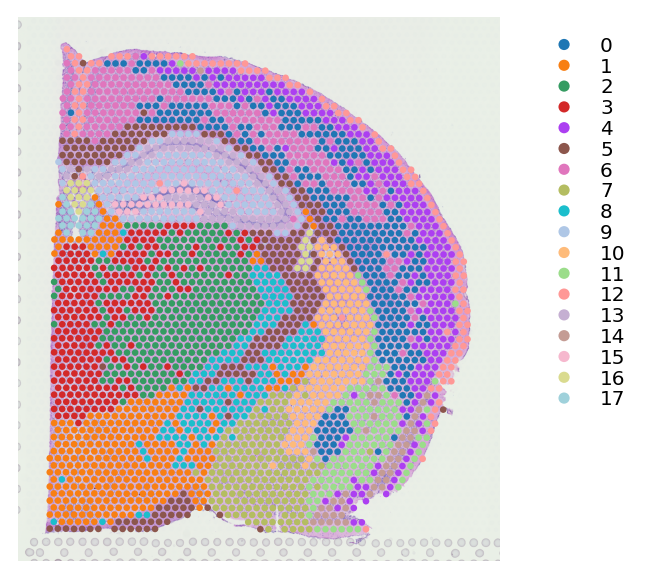

In [8]:
st.em.run_pca(data,n_comps=10,random_state=0)
st.pp.neighbors(data,n_neighbors=15,use_rep='X_pca',random_state=0)
st.tl.clustering.louvain(data,random_state=0)
st.pl.cluster_plot(data,use_label="louvain",tissue_alpha=1,spot_size=7,show_legend=True)

Add annotation from other software and visualize it into a scatter pie plot with donut chart

In [14]:
st.add.auto_annotate(data,annotation_path="deconvolution_result.csv")

The annotation is added to adata.obs['louvain_anno']


We also provide a `threshold` parameter that do the filtering based on quantile. The objective is removing the noise labels.

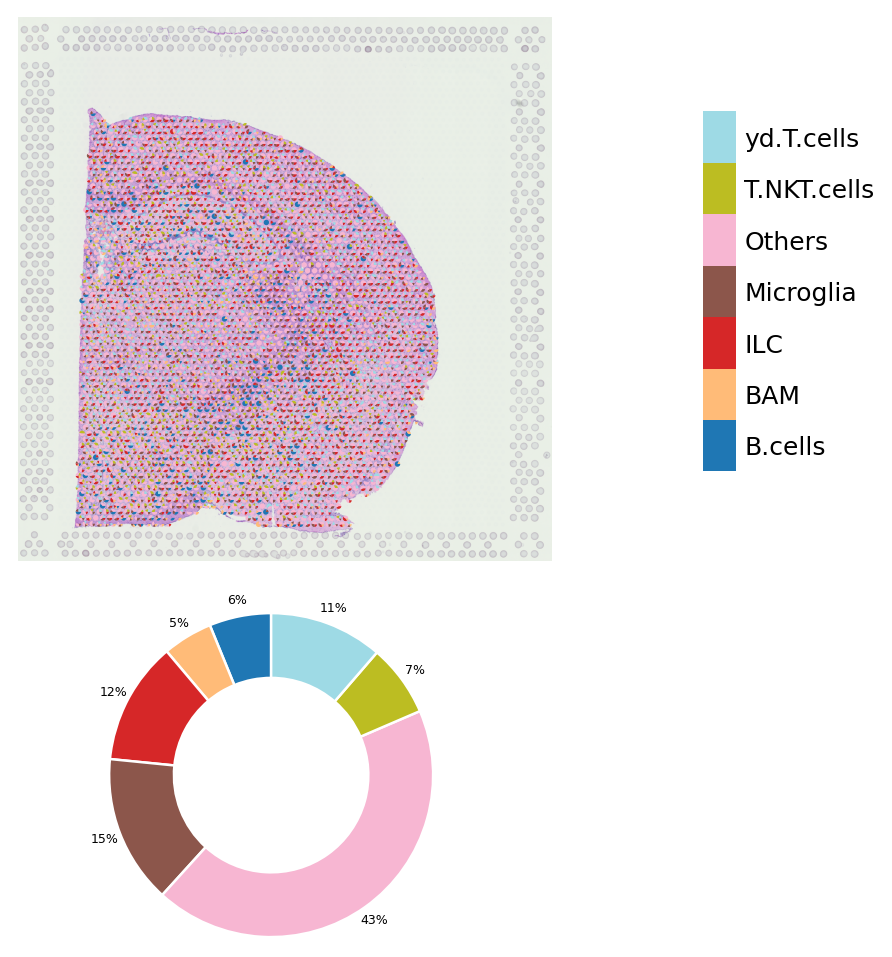

In [20]:
st.pl.deconvolution_plot(data,threshold=0.5)

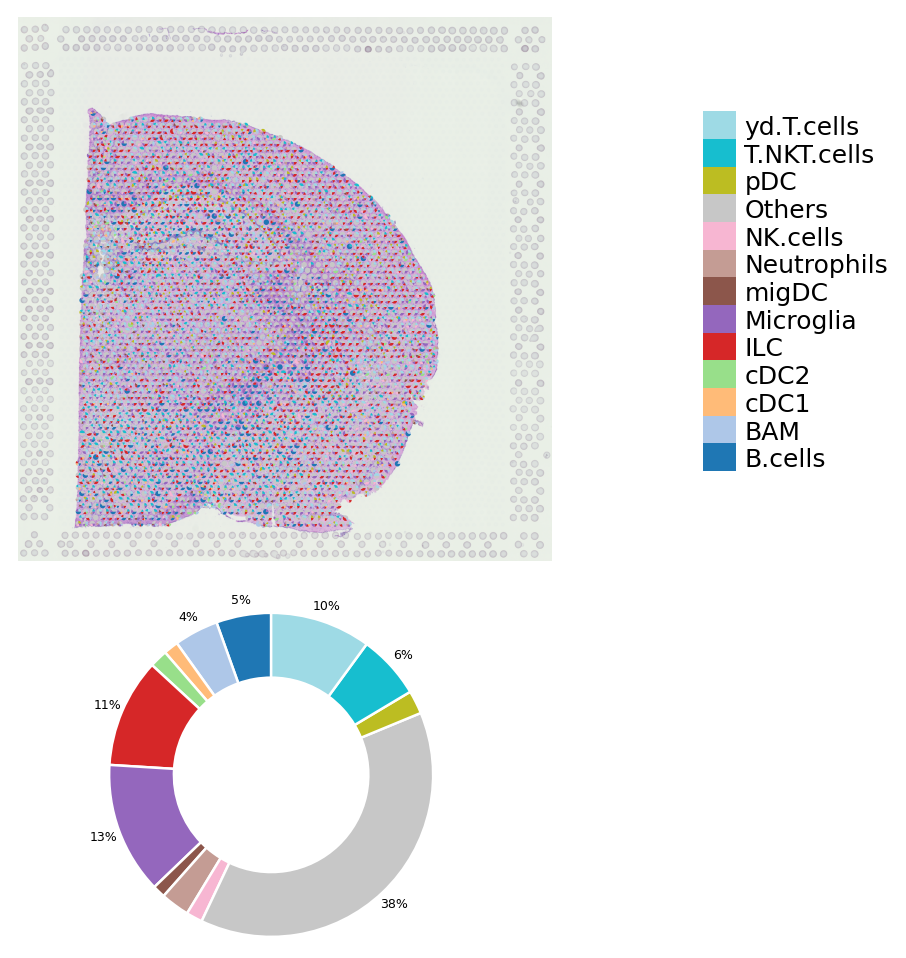

In [21]:
st.pl.deconvolution_plot(data,threshold=0.0)

You also can examine the proportion of cell types in each cluster

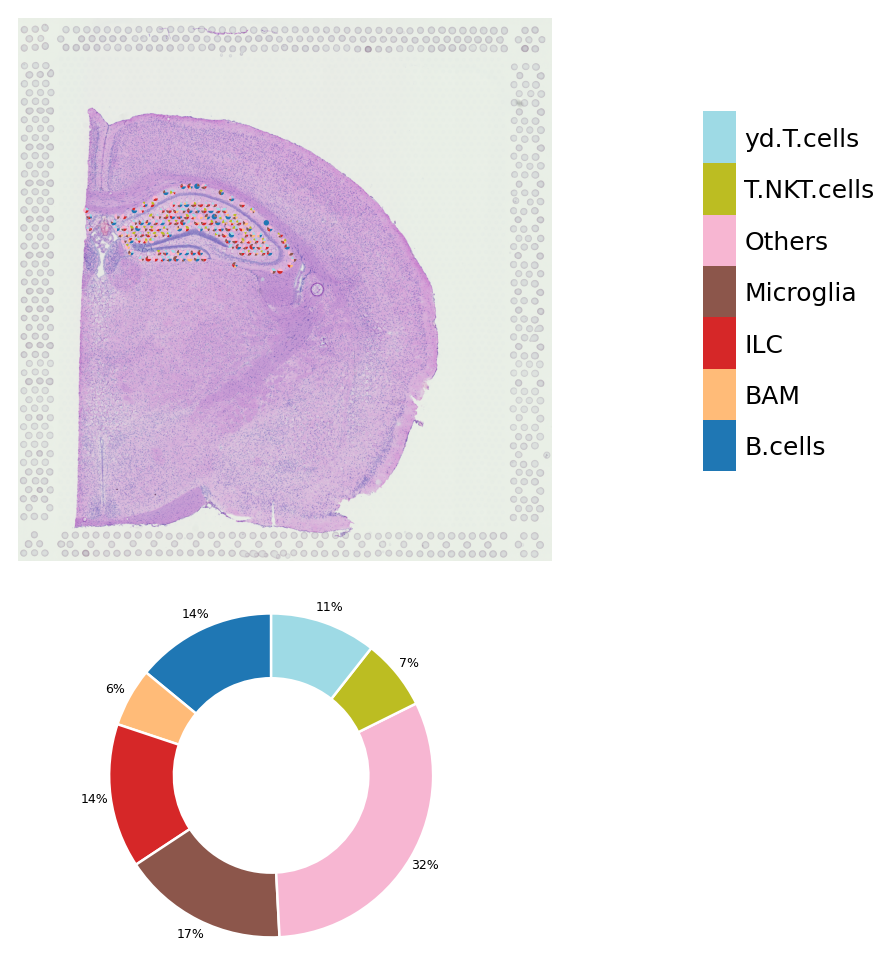

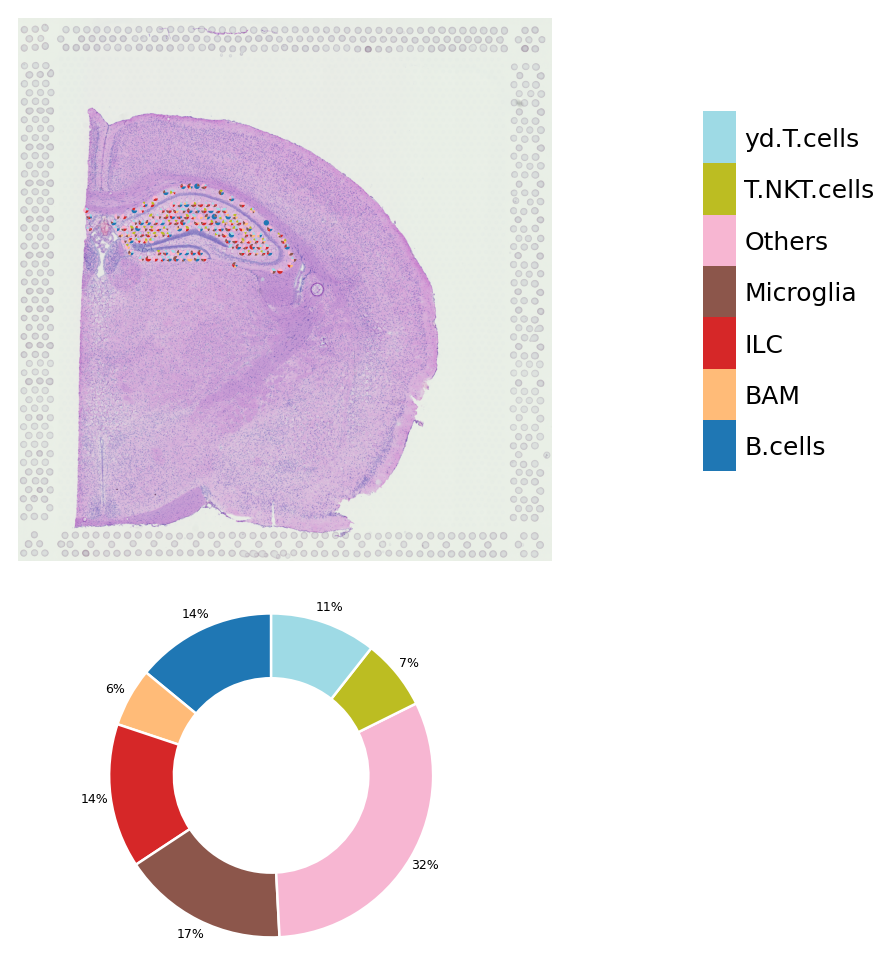

In [23]:
st.pl.deconvolution_plot(data,cluster=9)